The following notebook shows the convergence of the solver for $P_1$ with the nebulae dataset. Whats important about this dataset is the presence of vacuum and near vacuum regions. The plots below show, that in the presence of vacuum regions, the convergence suffers significantly. After introducing a minimum-treshold on the extinction, we see an improvement in the convergence behaviour with higher tresholds.

The dataset has resolution of $64\times 64\times 64$. The  Conjugate-Gradient solver on the normalform is used.

In [1]:
import os,sys,inspect

#import pnsolver
import renderer

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import util
import stencil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ipywidgets as widgets
from ipywidgets.widgets.interaction import interact

import scipy.io

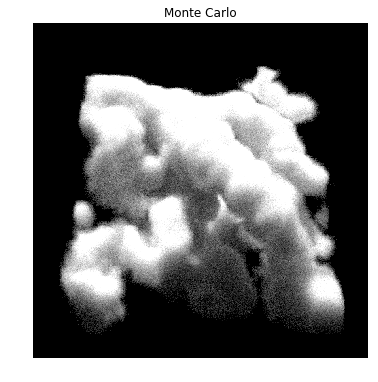

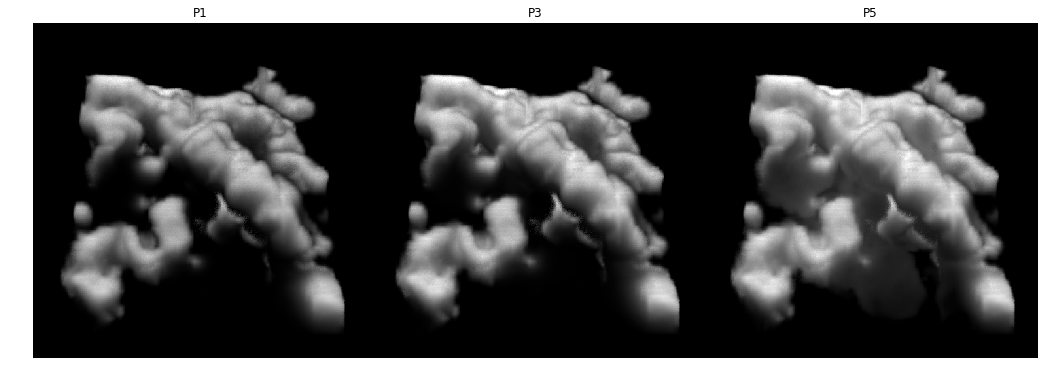

In [66]:

# groundtruth plot ========================
fig = plt.figure(figsize=(18,18));

ax = fig.add_subplot(131)
plt.title("Monte Carlo")
img = renderer.ldr_image(renderer.load_image("c:/projects/epfl/epfl17/python/pnsolver/nebulae_groundtruth_ms.exr"), exposure).asMatrix()
img = np.flipud(img)
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='gray', vmin=0.0, vmax=vmax, aspect=1)
plt.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()


# PN results ========================
fig = plt.figure(figsize=(18,18));

ax = fig.add_subplot(131)
plt.title("P1")
img = renderer.ldr_image(renderer.load_image("c:/projects/epfl/epfl17/python/pnsolver/nebulae_p1_3_ms.exr"), exposure).asMatrix()
vmax = np.max(img)
img = np.flipud(img)
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='gray', vmin=0.0, vmax=vmax, aspect=1)
plt.axis('off')


ax = fig.add_subplot(132)
plt.title("P3")
img = renderer.ldr_image(renderer.load_image("c:/projects/epfl/epfl17/python/pnsolver/nebulae_p3_3_ms.exr"), exposure).asMatrix()
img = np.flipud(img)
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='gray', vmin=0.0, vmax=vmax, aspect=1)
plt.axis('off')

ax = fig.add_subplot(133)
plt.title("P5")
img = renderer.ldr_image(renderer.load_image("c:/projects/epfl/epfl17/python/pnsolver/nebulae_p5_3_ms.exr"), exposure).asMatrix()
img = np.flipud(img)
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='gray', vmin=0.0, vmax=vmax, aspect=1)
plt.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()


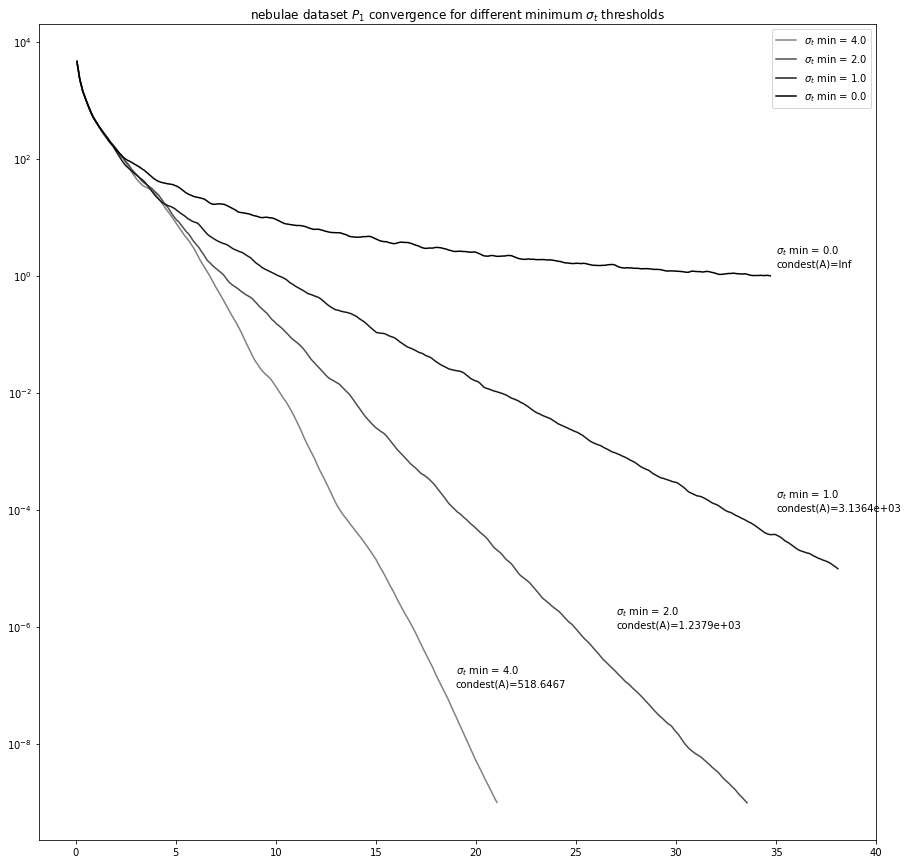

In [12]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111)

plt.title("nebulae dataset $P_1$ convergence for different minimum $\sigma_t$ thresholds")

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_4.pns.ls_cg.mat"
data = scipy.io.loadmat(filename)
convergence = data["convergence"][0]
time = data["timestamps"][0]
plt.semilogy( time, convergence, label="$\sigma_t$ min = 4.0", color=(0.5, 0.5, 0.5) )

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_5.pns.ls_cg.mat"
data = scipy.io.loadmat(filename)
convergence = data["convergence"][0]
time = data["timestamps"][0]
plt.semilogy( time, convergence, label="$\sigma_t$ min = 2.0", color=(0.3, 0.3, 0.3) )

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_6.pns.ls_cg.mat"
data = scipy.io.loadmat(filename)
convergence = data["convergence"][0]
time = data["timestamps"][0]
plt.semilogy( time, convergence, label="$\sigma_t$ min = 1.0", color=(0.1, 0.1, 0.1) )

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1.pns.ls_cg.mat"
data = scipy.io.loadmat(filename)
convergence = data["convergence"][0]
time = data["timestamps"][0]
plt.semilogy( time, convergence, label="$\sigma_t$ min = 0.0", color=(0.0, 0.0, 0.0) )

plt.legend(loc='best')



ax.annotate('$\sigma_t$ min = 0.0\ncondest(A)=Inf', xy=(35, 1.5), xytext=(35, 1.5) )
ax.annotate('$\sigma_t$ min = 1.0\ncondest(A)=3.1364e+03', xy=(35, 10.0e-5), xytext=(35, 10.0e-5) )
ax.annotate('$\sigma_t$ min = 2.0\ncondest(A)=1.2379e+03', xy=(27, 10.0e-7), xytext=(27, 10.0e-7) )
ax.annotate('$\sigma_t$ min = 4.0\ncondest(A)=518.6467', xy=(19, 10.0e-8), xytext=(19, 10.0e-8) )

plt.show()

----------------------------

### CDA multigrid test

In [ ]:
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111)

#plt.title("nebulae dataset $P_1$ convergence for different minimum $\sigma_t$ thresholds")

#filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_4.pns.ls_cg.mat"
#data = scipy.io.loadmat(filename)
#convergence = data["convergence"][0]
#time = data["timestamps"][0]
#plt.semilogy( time, convergence, label="$\sigma_t$ min = 4.0", color=(0.5, 0.5, 0.5) )

#filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_5.pns.ls_cg.mat"
#data = scipy.io.loadmat(filename)
#convergence = data["convergence"][0]
#time = data["timestamps"][0]
#plt.semilogy( time, convergence, label="$\sigma_t$ min = 2.0", color=(0.3, 0.3, 0.3) )

#filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1_6.pns.ls_cg.mat"
#data = scipy.io.loadmat(filename)
#convergence = data["convergence"][0]
#time = data["timestamps"][0]
#plt.semilogy( time, convergence, label="$\sigma_t$ min = 1.0", color=(0.1, 0.1, 0.1) )

#filename = "C:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p1.pns.ls_cg.mat"
#data = scipy.io.loadmat(filename)
#convergence = data["convergence"][0]
#time = data["timestamps"][0]
#plt.semilogy( time, convergence, label="$\sigma_t$ min = 0.0", color=(0.0, 0.0, 0.0) )

#plt.legend(loc='best')



#ax.annotate('$\sigma_t$ min = 0.0\ncondest(A)=Inf', xy=(35, 1.5), xytext=(35, 1.5) )
#ax.annotate('$\sigma_t$ min = 1.0\ncondest(A)=3.1364e+03', xy=(35, 10.0e-5), xytext=(35, 10.0e-5) )
#ax.annotate('$\sigma_t$ min = 2.0\ncondest(A)=1.2379e+03', xy=(27, 10.0e-7), xytext=(27, 10.0e-7) )
#ax.annotate('$\sigma_t$ min = 4.0\ncondest(A)=518.6467', xy=(19, 10.0e-8), xytext=(19, 10.0e-8) )

plt.show()

-----------------------------------------

In [1]:
import os,sys,inspect
import random

import renderer

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import util
import stencil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ipywidgets as widgets
from ipywidgets.widgets.interaction import interact

import scipy.io

In [2]:
def plot_spherical_function( fun, vmin=-0.5, vmax=0.5 ):
    # plot sh functions
    theta = np.arange(0.0, 1.0, 0.01)*np.pi
    phi = np.arange(0.0, 1.0, 0.01)*2.0*np.pi

    f_img = np.zeros((theta.shape[0], phi.shape[0]))
    for j in range(phi.shape[0]):
        for i in range(theta.shape[0]):
            f_img[i, j] = fun(theta[i], phi[j])
    #return plt.imshow(f_img, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax)
    #vmin = np.min(f_img)
    #vmax = np.max(f_img)
    #print("vmin={} vmax={}".format(vmin, vmax))
    return f_img
    #return plt.imshow(f_img, origin='lower',zorder=1, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, extent=[0.0,2.0*np.pi,0.0,np.pi])
def clamped_sh( pns, theta, phi ):
    # NB: the negative direction...
    value = pns.eval(pWS, -util.sphericalDirection(theta, phi))
    if value < 0.0:
        value = 0.0
    return value

def lookup_envmap( image, theta, phi ):
    uv = np.array([phi/(2.0*np.pi), theta/np.pi])
    pRaster = image.uvToRaster(uv)
    return image.eval( pRaster )[0]

In [3]:
pns = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/nebulae/nebulae_p5_2_ms.pns" )

In [4]:
pWS = np.array([-0.27704304, 0.36083166, -0.22953043])
sample = np.array([0.3960667149031164, 0.18571028805648737])
dir, pdf = pns.sample(pWS, sample)
pdf2 = pns.pdf( pWS, dir )

print(  "pdf={:.02} pdf2={:.02}".format(pdf, pdf2))

pdf=0.28 pdf2=0.28


In [4]:
pWS = np.array([-0.27704304, 0.36083166, -0.22953043])
for i in range(10):
    random.seed(1233*i)
    sample = np.array([random.random(), random.random()])
    dir, pdf = pns.sample(pWS, sample)
    #print( "dir={:.02f} {:.02f} {:.02f} pdf={:.02f} pdf2={:.02f}".format(dir[0], dir[1], dir[2], pdf, pns.pdf( pWS, dir )) )
    print( "sample={} {} {:.02f} pdf={:.02f} pdf2={:.02f}".format(sample[0], sample[1], dir[2], pdf, pns.pdf( pWS, dir )) )


sample=0.8444218515250481 0.7579544029403025 -0.29 pdf=0.06 pdf2=0.06
sample=0.3142213247793968 0.5092483334395765 0.63 pdf=0.26 pdf2=0.26
sample=0.34269932923990065 0.3338291650630897 0.59 pdf=0.30 pdf2=0.30
sample=0.005507409060454327 0.2267027921246627 0.99 pdf=0.20 pdf2=0.20
sample=0.3844554103010759 0.10123481629736619 0.55 pdf=0.22 pdf2=0.22
sample=0.5201918568626546 0.7149686774095101 0.36 pdf=0.08 pdf2=0.08
sample=0.3960667149031164 0.18571028805648737 0.53 pdf=0.24 pdf2=0.24
sample=0.9540394444092141 0.5742158471322767 -0.67 pdf=0.08 pdf2=0.08
sample=0.37858849022321517 0.49207364263387265 0.55 pdf=0.24 pdf2=0.24
sample=0.7768161653922486 0.05991497313301053 -0.12 pdf=0.13 pdf2=0.13


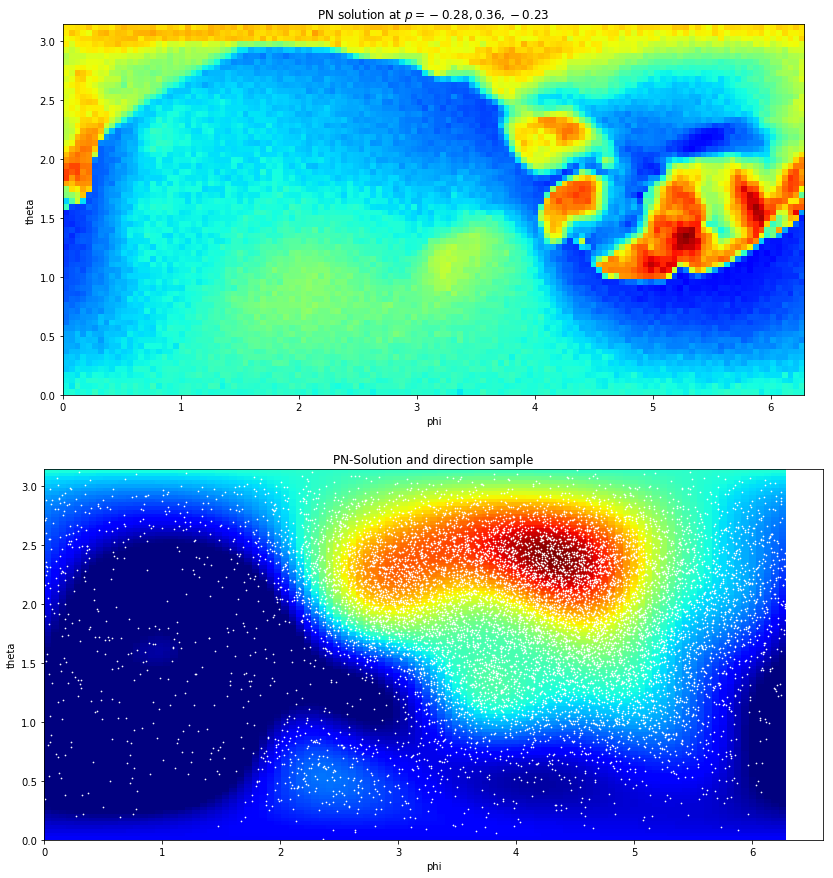

In [11]:
#for i in range(10):
#random.seed(1233*i)
#pWS = np.array([random.random()*2.0, random.random()*2.0, random.random()*2.0])
pWS = np.array([-0.27704304, 0.36083166, -0.22953043])

# visualize samples and the sampled sh function ------------------
samples_theta = []
samples_phi = []

numSamples = 10000
for i in range(numSamples):
    d, d_pdf = pns.sample(pWS, np.array([random.random(), random.random()]))
    d = -d
    theta, phi = util.sphericalCoordinates(d)
    samples_theta.append(theta)
    samples_phi.append(phi)
    #pass

d = np.array([0.98402586, -0.13131811, 0.12020254])
theta, phi = util.sphericalCoordinates(d)
samples_theta.append(theta)
samples_phi.append(phi)




fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(211)
plt.title("PN solution at $p={:.2f}, {:.2f}, {:.2f}$".format(pWS[0], pWS[1], pWS[2]))
img = renderer.load_image("c:/projects/epfl/epfl17/python/pnsolver/nebulae_dbg_fluence.exr").asMatrix()
img = np.flipud(img)
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='jet', vmin=0.0, vmax=np.max(img), extent=[0.0,2.0*np.pi,0.0,np.pi])
plt.xlabel('phi')
plt.ylabel('theta')
#plt.scatter(samples_phi, samples_theta, c='w', label="sdda",zorder=2, marker='.', s=1.0)
#plt.scatter(samples_phi, samples_theta, c='r', label="sdda",zorder=2, marker='.', s=1.0)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(img_view, cax=cax)

ax = fig.add_subplot(212)
plt.title("PN-Solution and direction sample")
img = plot_spherical_function( lambda theta, phi: clamped_sh(pns, theta, phi) )
img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='jet', vmin=0.0, vmax=np.max(img), extent=[0.0,2.0*np.pi,0.0,np.pi])
plt.xlabel('phi')
plt.ylabel('theta')
plt.scatter(samples_phi, samples_theta, c='w', label="sdda",zorder=2, marker='.', s=2.0)

#img = plot_spherical_function( lambda theta, phi: pns.pdf(pWS, -util.sphericalDirection(theta, phi)) )
#img_view = plt.imshow(img, origin='lower',zorder=1, interpolation="nearest", cmap='jet', vmin=0.0, vmax=np.max(img), extent=[0.0,2.0*np.pi,0.0,np.pi])

plt.show()